# Random Tomato Movies dataset using all type of programs like classification, logistic regression, Random forest algorithm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv("Rotten_Tomatoes_Movies3.csv",encoding="latin-1")
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0


In [3]:
df.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16483.000000,16638.000000,16638.000000,16386.000000
mean,102.391494,60.466522,56.607104,60.470829
std,25.028011,28.587230,66.383800,20.462368
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

In [5]:
# find the null values
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [8]:
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [9]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0


In [10]:
from sklearn.preprocessing import LabelEncoder
cols = ['movie_info',"critics_consensus","genre",'directors',"writers","cast","in_theaters_date","on_streaming_date",
        "runtime_in_minutes","studio_name","audience_rating"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [11]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,1970,7230,PG,217,1340,2333,9771,2100,2109,57,6,Rotten,49,144,50
1,Please Give,9432,4690,R,752,5919,8709,2484,5360,1395,64,2319,Certified Fresh,86,140,61
2,10,4290,8307,R,860,892,1292,4255,990,1977,92,2752,Fresh,68,22,50
3,12 Angry Men (Twelve Angry Men),449,5491,NR,689,7292,9585,10315,2292,411,69,650,Certified Fresh,100,51,94
4,"20,000 Leagues Under The Sea",13974,4802,G,286,6595,3365,6731,33,1439,101,718,Fresh,89,27,71


# Here change the tomatometer status having fresh, Certified fresh is 1, Rotten is 0

In [12]:
df['tomatometer_status'] = df['tomatometer_status'].replace({
    'Fresh': 1,
    'Certified Fresh': 1,
    'Rotten': 0
})

C:\Users\SASI REKHA\AppData\Local\Temp\ipykernel_1384\1151019991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tomatometer_status'] = df['tomatometer_status'].replace({


In [13]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,1970,7230,PG,217,1340,2333,9771,2100,2109,57,6,0,49,144,50
1,Please Give,9432,4690,R,752,5919,8709,2484,5360,1395,64,2319,1,86,140,61
2,10,4290,8307,R,860,892,1292,4255,990,1977,92,2752,1,68,22,50
3,12 Angry Men (Twelve Angry Men),449,5491,NR,689,7292,9585,10315,2292,411,69,650,1,100,51,94
4,"20,000 Leagues Under The Sea",13974,4802,G,286,6595,3365,6731,33,1439,101,718,1,89,27,71


In [14]:
df = df.dropna(subset=['tomatometer_status'])

In [15]:
df['tomatometer_status'].isna().sum()


np.int64(0)

In [16]:
df['tomatometer_status'].value_counts()

tomatometer_status
1    9405
0    7233
Name: count, dtype: int64

In [17]:
X = df.drop(['movie_title','tomatometer_status'], axis=1)

y = df['tomatometer_status']

Handle Categorical Data

Convert categorical columns to numeric using One-Hot Encoding.

In [18]:
X = pd.get_dummies(X, drop_first=True)

# LogesticRegression

Train-Test Split

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [45]:

from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9399038461538461


C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RandomForest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

In [23]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
y_pred=model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
print('Accuracy of my Model:',accuracy_score(y_test,y_pred)*100,'%')

Accuracy of my Model: 93.99038461538461 %


# Support Vector Machine

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,1784,85
Not Fraud,115,1344


<Axes: >

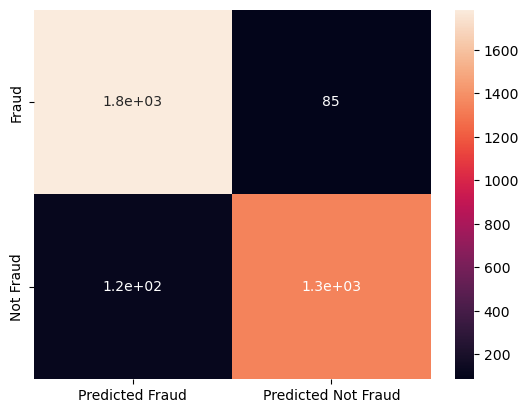

In [34]:
sns.heatmap(conf_matrix, annot=True)

In [38]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Models (optimized for speed)
models = {
"Logistic Regression": LogisticRegression(max_iter=1000),
"Random Forest": RandomForestClassifier(n_estimators=100, random_state=50),
"XGBoost": XGBClassifier(tree_method='hist', predictor='predictor', use_label_encoder=False, eval_metric='logloss', random_state=42),
"Linear SVM": CalibratedClassifierCV(LinearSVC(random_state=42, max_iter=5000)) # calibrated for probabilities
}

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SASI REKHA\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:47:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


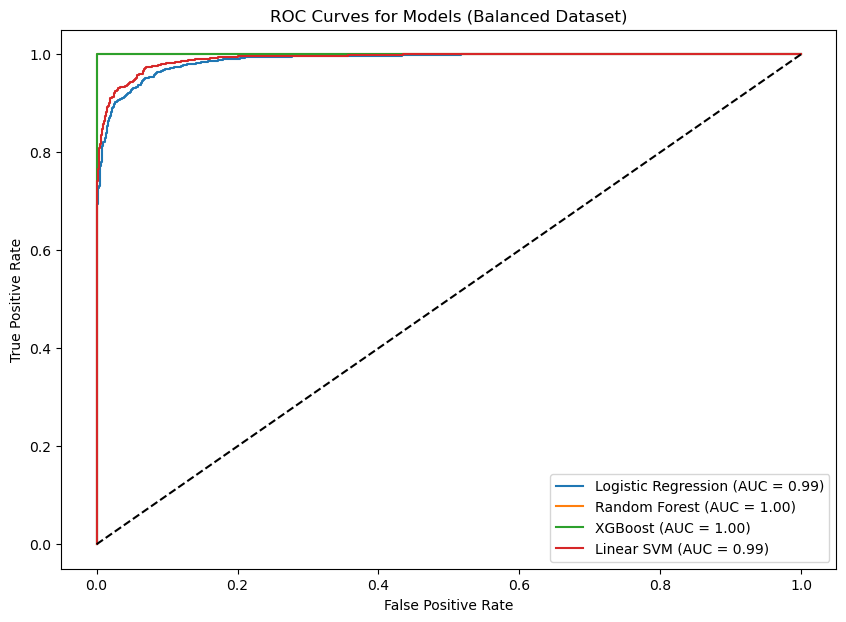


Model Performance Summary:

                     Precision    Recall  F1-Score   AUC-ROC
Logistic Regression   0.939442  0.954521  0.946921  0.987943
Random Forest         1.000000  1.000000  1.000000  1.000000
XGBoost               1.000000  1.000000  1.000000  1.000000
Linear SVM            0.954618  0.956661  0.955639  0.991575


In [43]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
results = {}   # 🔹 IMPORTANT

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results[name] = {"Precision": precision, "Recall": recall, "F1-Score": f1, "AUC-ROC": auc}

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models (Balanced Dataset)")
plt.legend()
plt.show()

# Print results
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:\n")
print(results_df)